In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 250)
pd.set_option('max_colwidth', 100)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
health_df = pd.read_csv('/home/andrei/git/untracked/nas_health_20210621.csv', parse_dates=True)
health_df['date'] = health_df['date'].map(pd.to_datetime)
for column in ['rootused', 'rootinodes', 'dataused', 'datainodes']:
    health_df[column] = health_df[column].map(lambda x: int(x.replace('%', '')))

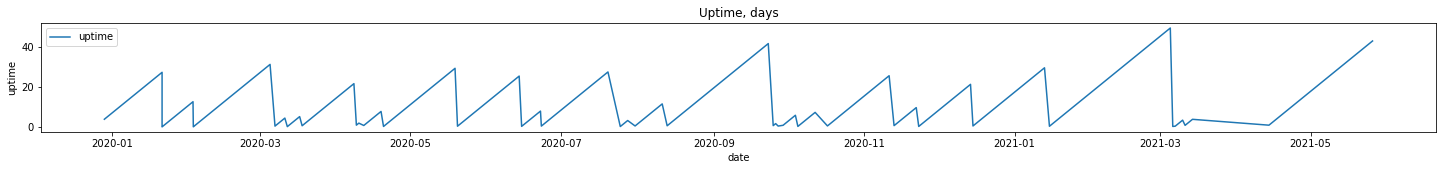

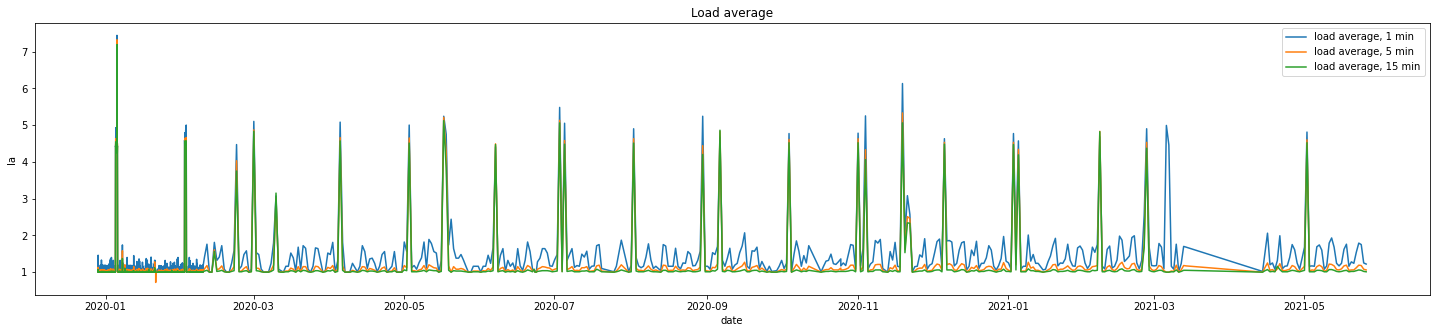

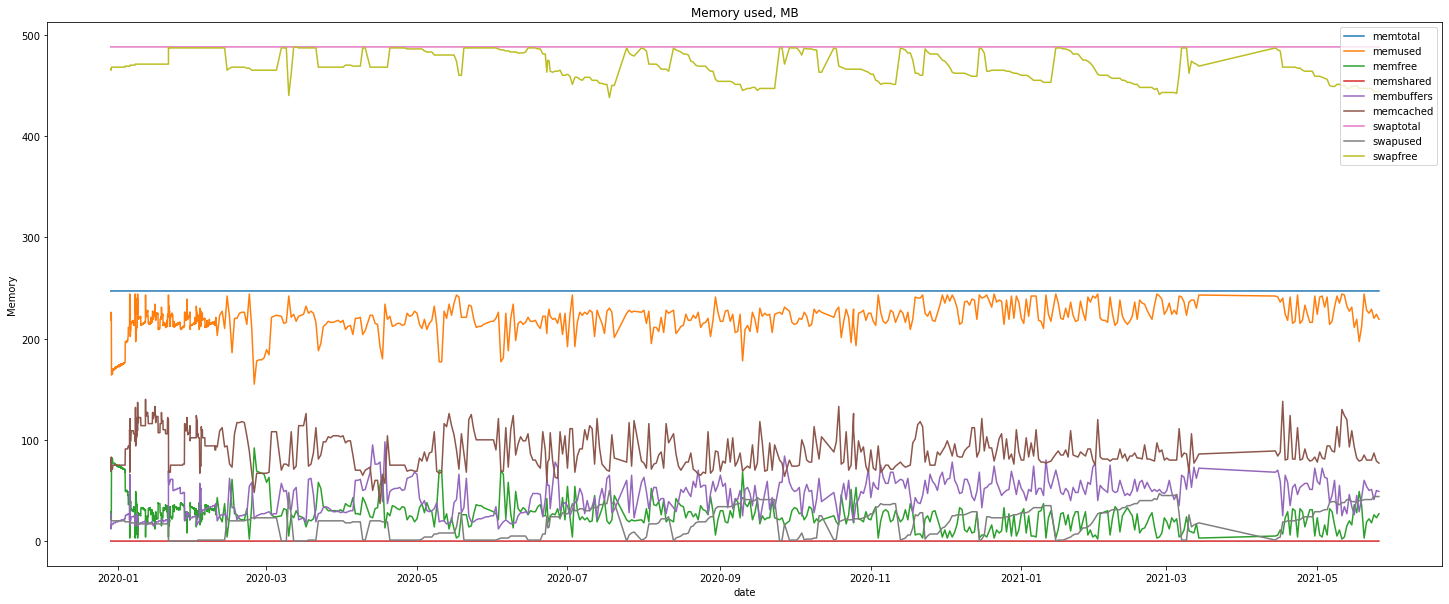

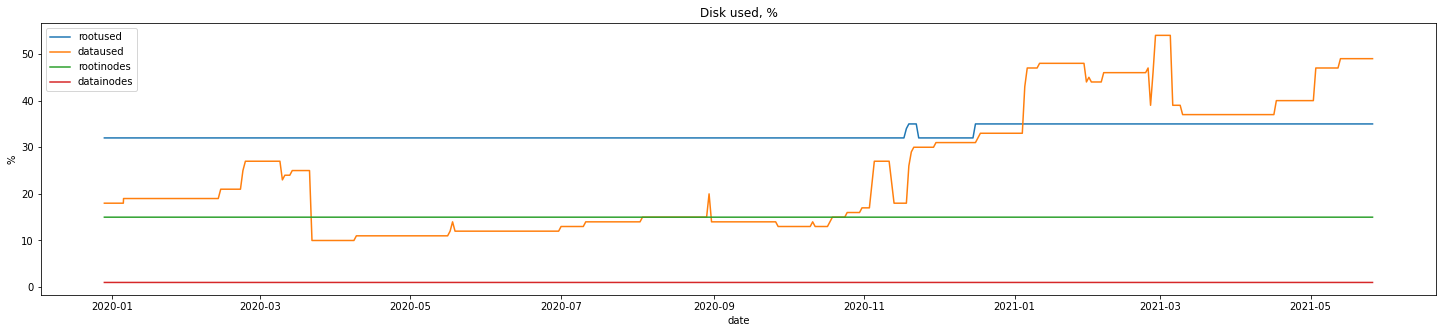

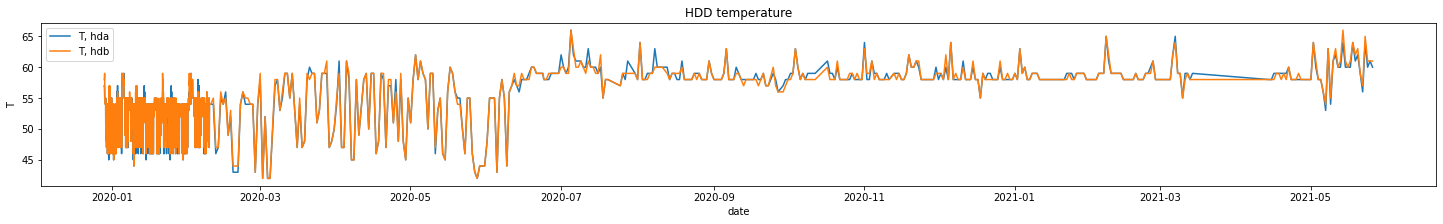

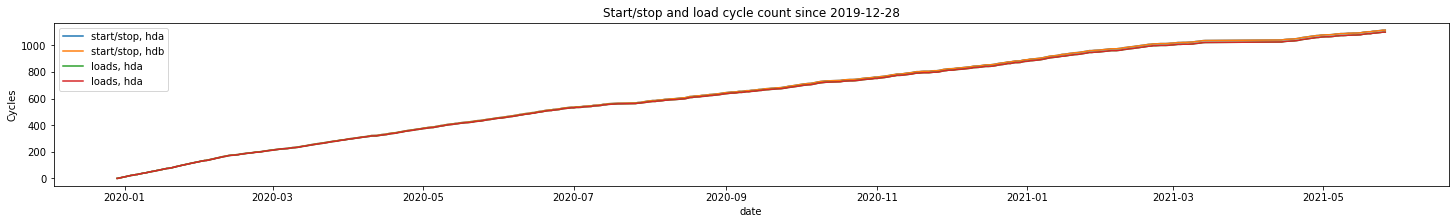

In [3]:
plt.figure(figsize=(25,2))
plt.plot(health_df['date'], health_df['uptime'] / 3600 / 24, label='uptime')
plt.title('Uptime, days')
plt.xlabel('date')
plt.ylabel('uptime')
plt.legend()
plt.show()


plt.figure(figsize=(25,5))
plt.plot(health_df['date'], health_df['la1min'], label='load average, 1 min')
plt.plot(health_df['date'], health_df['la5min'], label='load average, 5 min')
plt.plot(health_df['date'], health_df['la15min'], label='load average, 15 min')
plt.title('Load average')
plt.xlabel('date')
plt.ylabel('la')
plt.legend()
plt.show()

plt.figure(figsize=(25,10))
plt.plot(health_df['date'], health_df['memtotal'], label='memtotal')
plt.plot(health_df['date'], health_df['memused'], label='memused')
plt.plot(health_df['date'], health_df['memfree'], label='memfree')
plt.plot(health_df['date'], health_df['memshared'], label='memshared')
plt.plot(health_df['date'], health_df['membuffers'], label='membuffers')
plt.plot(health_df['date'], health_df['memcached'], label='memcached')
plt.plot(health_df['date'], health_df['swaptotal'], label='swaptotal')
plt.plot(health_df['date'], health_df['swapused'], label='swapused')
plt.plot(health_df['date'], health_df['swapfree'], label='swapfree')
plt.title('Memory used, MB')
plt.xlabel('date')
plt.ylabel('Memory')
plt.legend()
plt.show()

plt.figure(figsize=(25,5))
plt.plot(health_df['date'], health_df['rootused'], label='rootused')
plt.plot(health_df['date'], health_df['dataused'], label='dataused')
plt.plot(health_df['date'], health_df['rootinodes'], label='rootinodes')
plt.plot(health_df['date'], health_df['datainodes'], label='datainodes')
plt.title('Disk used, %')
plt.xlabel('date')
plt.ylabel('%')
plt.legend()
plt.show()

plt.figure(figsize=(25,3))
plt.plot(health_df['date'], health_df['T(hda)'], label='T, hda')
plt.plot(health_df['date'], health_df['T(hdb)'], label='T, hdb')
plt.title('HDD temperature')
plt.xlabel('date')
plt.ylabel('T')
plt.legend()
plt.show()

plt.figure(figsize=(25,3))
plt.plot(health_df['date'], health_df['startstop(hda)']-health_df['startstop(hda)'][0], label='start/stop, hda')
plt.plot(health_df['date'], health_df['startstop(hdb)']-health_df['startstop(hdb)'][0], label='start/stop, hdb')
plt.plot(health_df['date'], health_df['loads(hda)']-health_df['loads(hda)'][0], label='loads, hda')
plt.plot(health_df['date'], health_df['loads(hdb)']-health_df['loads(hdb)'][0], label='loads, hda')
plt.title('Start/stop and load cycle count since {}'.format(health_df['date'][0].strftime('%Y-%m-%d')))
plt.xlabel('date')
plt.ylabel('Cycles')
plt.legend()
plt.show()